# <center>Cluster Algorithm</center>
 <center>**<font size = 5>K-means</font>**</center>






 
 <center>**<font size = 5>Author : zhangxinye</font>**</center>
<br/>
<center>**<font size = 5>Date : 20180914</font>**</center>

**k-means clustering** is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

## 一、基本概念

聚类算法：聚类是指将数据集划分为若干类，使得类内之间的数据最为相似，各类之间的数据相似度差别尽可能大,属于无监督学习
<br>
K-means算法：K-means算法以欧式距离作为相似度测度，它是求对应某一初始聚类中心向量V最优分类，使得评价指标J最小。算法采用误差平方和准则函数作为聚类准则函数
<br>
距离量度：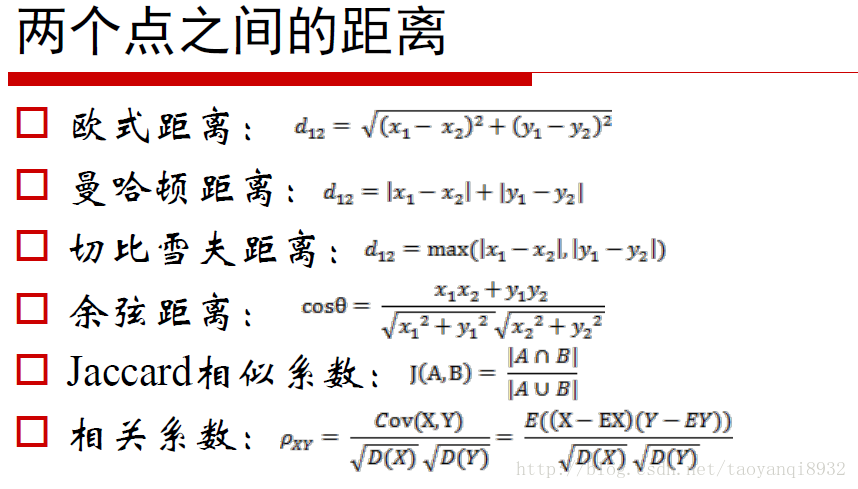



## 二、算法流程

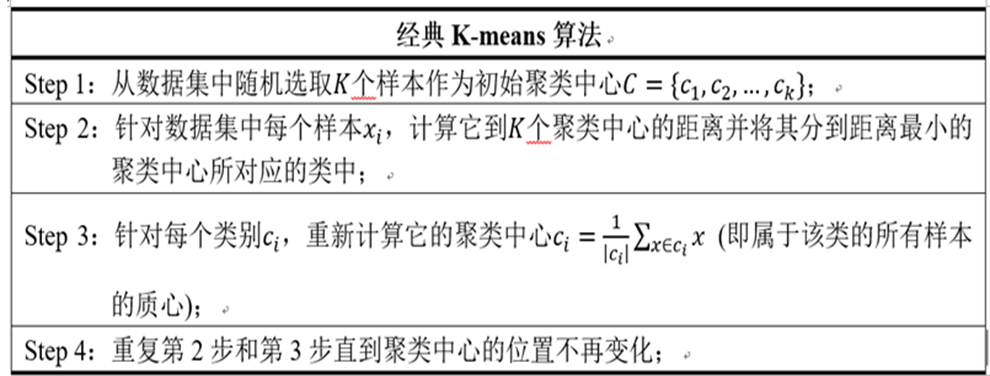



Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:
    ![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)
where μi is the mean of points in Si. This is equivalent to minimizing the pairwise squared deviations of points in the same cluster:
    ![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/9fb2388a00fcf4f1df3117883fccd0c4028da33d)
The equivalence can be deduced from identity![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/009145430778f69c28e5852d434f0d07e5ca896d)


![image.png](https://img-blog.csdn.net/20161218153627385?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdGFveWFucWk4OTMy/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)

![image.png](https://img-blog.csdn.net/20161218154045261?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdGFveWFucWk4OTMy/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)

## 三、算法改进

1、初始化选择--------k-means++
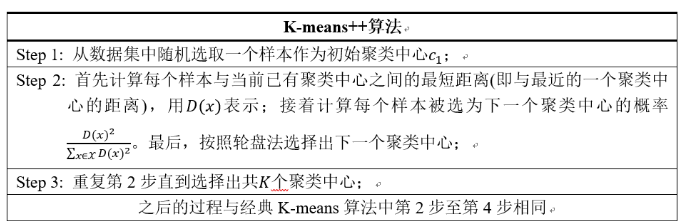
https://www.cnblogs.com/wang2825/articles/8696830.html

2、奇异点问题--------K-Median
用曼哈顿距离选中心作为新的中心点

 3、动态分配k
<br> **isodata Iterative Self Organizing Data Analysis Techniques Algorithm**
<br>所需要的参数：
<br>预期的聚类中心数目Ko
<br>每个类所要求的最少样本数目Nmin
<br>最大方差Sigma
<br>两个类别对应聚类中心之间所允许最小距离dmin
<br>允许迭代的最多次数maxIts
![image.png](https://images2015.cnblogs.com/blog/1024143/201701/1024143-20170111025947447-390971451.png)
![image.png](https://images2015.cnblogs.com/blog/1024143/201701/1024143-20170111025950760-1467458924.png)


![image.png](https://images2015.cnblogs.com/blog/1024143/201701/1024143-20170111025953056-677584793.png)



4、较少计算量----------minibatch k-means
<br/>用样本集中的一部分样本来做传统的k-means，避免样本量太大时的计算难题，算法收敛速度加快，会以精度为代价
<br/>通常采用无放回随机采样得到，会多跑几次算法，得到不同的随机采样集来得到聚类簇，选择最优聚类簇

## 4、优缺点

优点：计算简单，运行速度快
<br>
缺点：
k均值算法非常简单且使用广泛，但是其有主要的两个缺陷： 
1. K值需要预先给定，属于预先知识，很多情况下K值的估计是非常困难的，对于像计算全部微信用户的交往圈这样的场景就完全的没办法用K-Means进行。对于可以确定K值不会太大但不明确精确的K值的场景，可以进行迭代运算，然后找出Cost Function最小时所对应的K值，这个值往往能较好的描述有多少个簇类。 
2. K-Means算法对初始选取的聚类中心点是敏感的，不同的随机种子点得到的聚类结果完全不同 
3. K均值算法并不是很所有的数据类型。它不能处理非球形簇、不同尺寸和不同密度的簇，银冠指定足够大的簇的个数是他通常可以发现纯子簇。 
4. 对离群点的数据进行聚类时，K均值也有问题，这种情况下，离群点检测和删除有很大的帮助。
<br/>5.K-means算法不适用于非球形簇的聚类，而且不同尺寸和密度的类型的簇，也不太适合。 
<br/>6.可能收敛到局部值。


# 5、python代码

In [1]:
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [3]:
#解决中文显示问题
mpl.rcParams['font.sans-serif'] = ['SimHei'];
mpl.rcParams['axes.unicode_minus'] = False


centers=[[1,1],[-1,-1],[1,-1]]
clusters=len(centers)
X,Y=make_blobs(n_samples=300,centers=centers,cluster_std=0.7,random_state=28)

#构建kmeans算法
k_means =  KMeans(init="k-means++",n_clusters=clusters,random_state=28)
t0 = time.time()
k_means.fit(X)      #模型训练
km_batch = time.time()-t0       #使用kmeans训练数据消耗的时间
print("K-Means算法模型训练消耗时间:%.4fs"%km_batch)

#构建mini batch kmeans算法
batch_size = 100        #采样集的大小
mbk = MiniBatchKMeans(init="k-means++",n_clusters=clusters,batch_size=batch_size,random_state=28)
t0 = time.time()
mbk.fit(X)
mbk_batch = time.time()-t0
print("Mini Batch K-Means算法模型训练消耗时间:%.4fs"%mbk_batch)


#预测结果
km_y_hat = k_means.predict(X)
mbk_y_hat = mbk.predict(X)

#获取聚类中心点并对其排序
k_means_cluster_center = k_means.cluster_centers_
mbk_cluster_center = mbk.cluster_centers_
print("K-Means算法聚类中心点:\n center=",k_means_cluster_center)
print("Mini Batch K-Means算法聚类中心点:\n center=",mbk_cluster_center)
order = pairwise_distances_argmin(k_means_cluster_center,mbk_cluster_center)
 
#画图
plt.figure(figsize=(12,6),facecolor="w")
plt.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.9)
cm = mpl.colors.ListedColormap(['#FFC2CC', '#C2FFCC', '#CCC2FF'])
cm2 = mpl.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])




K-Means算法模型训练消耗时间:1.2959s
Mini Batch K-Means算法模型训练消耗时间:0.0148s
K-Means算法聚类中心点:
 center= [[ 0.96091862  1.13741775]
 [ 1.1979318  -1.02783007]
 [-0.98673669 -1.09398768]]
Mini Batch K-Means算法聚类中心点:
 center= [[ 1.34304199 -1.01641075]
 [ 0.83760683  1.01229021]
 [-0.92702179 -1.08205992]]


<Figure size 864x432 with 0 Axes>

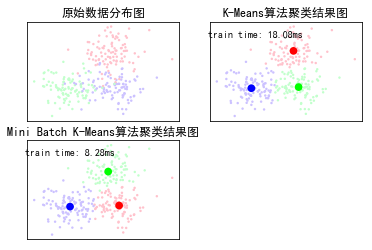

In [14]:
#子图1——原始数据
plt.subplot(221)
plt.scatter(X[:,0],X[:,1],c=Y,s=6,cmap=cm,edgecolors="none")
plt.title(u"原始数据分布图")
plt.xticks(())
plt.yticks(())
plt.grid(True)

#子图2：K-Means算法聚类结果图
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=km_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(k_means_cluster_center[:,0], k_means_cluster_center[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'K-Means算法聚类结果图')
plt.xticks(())
plt.yticks(())
plt.text(-3, 2,  'train time: %.2fms' % (km_batch*1000))
plt.grid(True)

#子图三Mini Batch K-Means算法聚类结果图
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=mbk_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(mbk_cluster_center[:,0], mbk_cluster_center[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'Mini Batch K-Means算法聚类结果图')
plt.xticks(())
plt.yticks(())
plt.text(-3, 2,  'train time: %.2fms' % (mbk_batch*1000))
plt.grid(True)
plt.show()


In [2]:
pairwise_distances_argmin??